In [42]:
# Setting up the Colab page to use neqsim
%%capture
!pip install neqsim
from neqsim.process import openprocess
import urllib
import time
# Importing the MEG dehydration process from file
!wget https://github.com/equinor/neqsimprocess/raw/master/lib/MEGdehydrationProcess.neqsim

#Documentation
See: https://github.com/equinor/neqsimprocess/blob/master/doc/MEGdehydrationprocess.pdf

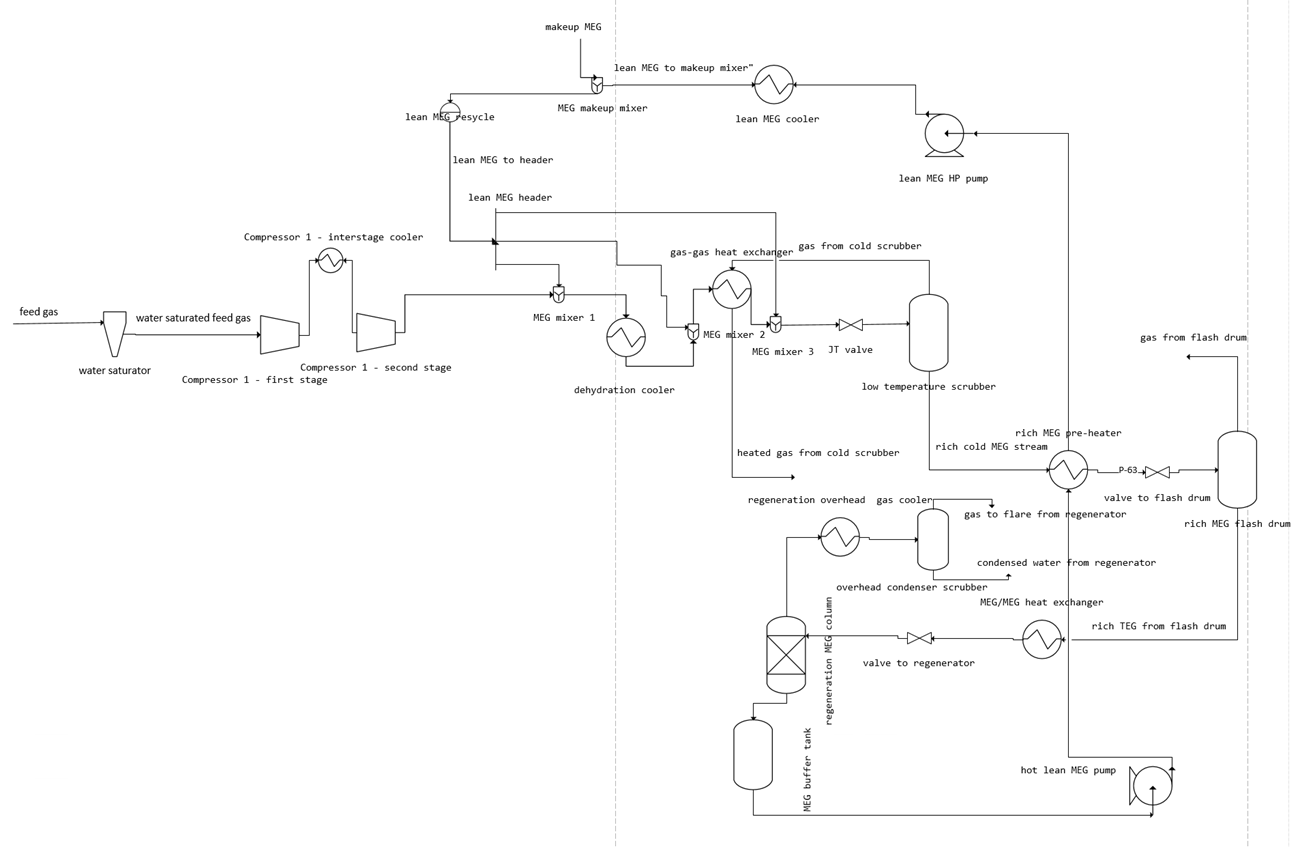

In [43]:
# importing the process from the stored file
# See: https://github.com/equinor/neqsimprocess/blob/master/src/neqsimprocess/glycol/MEGdehydrationProcess.java
# See Figure 1 for process flow diagram
MEGprocess = openprocess('MEGdehydrationProcess.neqsim')

In [44]:
# Set input parameters
MEGprocess.getUnit("feed gas").setFlowRate(10.5, 'MSm3/day')
MEGprocess.getUnit("feed gas").setTemperature(6.0, 'C')
MEGprocess.getUnit("feed gas").setPressure(53.0, "bara")
MEGprocess.getUnit("Compressor 1 - first stage").setOutletPressure(70.0, "bara")
MEGprocess.getUnit("Compressor 1 - interstage cooler").setOutTemperature(40.0, "C")
MEGprocess.getUnit("Compressor 1 - second stage").setOutletPressure(105.0, "bara")
MEGprocess.getUnit("lean MEG to header").setFlowRate(1000.0, "kg/hr")
MEGprocess.getUnit("lean MEG to header").setTemperature(20.0, "C")
MEGprocess.getUnit("lean MEG to header").setPressure(105.0, "bara")
MEGprocess.getUnit("dehydration cooler").setOutTemperature(10.0, "C")
MEGprocess.getUnit("gas-gas heat exchanger").setUAvalue(30000.0)
MEGprocess.getUnit("JT valve").setOutletPressure(92.0)
MEGprocess.getUnit("rich MEG pre-heater").setOutTemperature(15.0, "C")
MEGprocess.getUnit("valve to flash drum").setOutletPressure(10.0)
MEGprocess.getUnit("MEG/MEG heat exchanger").setUAvalue(500.0)
MEGprocess.getUnit("valve to regenerator").setOutletPressure(1.23)
MEGprocess.getUnit("MEG regeneration column").getReboiler().setOutTemperature(273.15 + 135.0)
MEGprocess.getUnit("MEG regeneration column").getCondenser().setOutTemperature(273.15 + 105.0)
MEGprocess.getUnit("regeneration overhead  gas cooler").setOutTemperature(273.15 + 20.0)
MEGprocess.getUnit("MEG buffer tank").setOutTemperature(273.15+130.0)
MEGprocess.getUnit("hot lean MEG pump").setOutletPressure(20.0)
MEGprocess.getUnit("hot lean MEG pump").setIsentropicEfficiency(0.75)
MEGprocess.getUnit("lean MEG HP pump").setOutletPressure(105.0)
MEGprocess.getUnit("lean MEG HP pump").setIsentropicEfficiency(0.75)
MEGprocess.getUnit("lean MEG cooler").setOutTemperature(273.15 + 20.0)

In [45]:
#Run the process calculations
tic = time.perf_counter()
MEGprocess.run()
toc = time.perf_counter()
print(f"Simulation run in {toc - tic:0.4f} seconds")




Simulation run in 116.4956 seconds


In [46]:
#Read results
wetGasRatekghr = MEGprocess.getUnit("water saturated feed gas").getFlowRate("kg/hr")
waterInWetGasppm = TEGprocess.getUnit("water saturated feed gas").getFluid().getPhase(0).getComponent('water').getz()*1.0e6
waterInDryGasppm = TEGprocess.getUnit("gas from cold scrubber").getFluid().getPhase(0).getComponent('water').getz()*1.0e6
compressor1Power = MEGprocess.getUnit("Compressor 1 - first stage").getPower()/1.0e6
compressor2Power = MEGprocess.getUnit("Compressor 1 - second stage").getPower()/1.0e6
intercoolerDtuy = MEGprocess.getUnit("Compressor 1 - interstage cooler").getDuty()/1.0e6
gasTemperatureFromGasGasHX1 = MEGprocess.getUnit("gas-gas heat exchanger").getOutStream(0).getTemperature('C')
gasTemperatureFromGasGasHX2 = MEGprocess.getUnit("gas-gas heat exchanger").getOutStream(1).getTemperature('C')
leanMEGwtpr = MEGprocess.getUnit("lean MEG to header").getFluid().getPhase("aqueous").getWtFrac("MEG")*100.0
richMEGwtpr = MEGprocess.getUnit("rich cold MEG stream").getFluid().getPhase("aqueous").getWtFrac("MEG")*100.0
reboilerDuty = MEGprocess.getUnit("MEG regeneration column").getReboiler().getDuty()/1.0e6
condenserDuty= MEGprocess.getUnit("MEG regeneration column").getCondenser().getDuty()/1.0e6
hotLeanMEGpumppower = MEGprocess.getUnit("hot lean MEG pump").getEnergy()/1.0e3
leanMEGHPpumppower =MEGprocess.getUnit("lean MEG HP pump").getEnergy()/1.0e3

In [47]:
print('gas rate to dehdration process ', wetGasRatekghr, ' kg/hr')
print('water in wet gas ', waterInWetGasppm, ' ppm(mole)')
print('water in dry gas ', waterInDryGasppm, ' ppm(mole)')
print('Compressor 1 - first stage - power ',compressor1Power, 'MW')
print('Compressor 1 - second stage - power ',compressor2Power, 'MW')
print('Compressor 1 - interstage cooler - duty ',intercoolerDtuy, 'MW')
print('gas-gas heat exchanger - temperature out1 ',gasTemperatureFromGasGasHX1, ' C')
print('gas-gas heat exchanger - temperature out2 ',gasTemperatureFromGasGasHX2, ' C')
print('lean MEG to header - wt% MEG ',leanMEGwtpr, ' wt%')
print('rich cold MEG stream - wt% MEG ',richMEGwtpr, ' wt%')
print('MEG regeneration column - reboiler duty ',reboilerDuty, 'MW')
print('Compressor 1 - second stage - condenser duty ',condenserDuty, 'MW')
print('hot lean MEG pump - power ',hotLeanMEGpumppower, 'kW')
print('lean MEG HP pump - power ',leanMEGHPpumppower, 'kW')


gas rate to dehdration process  298384.30544715957  kg/hr
water in wet gas  229.53328376455732  ppm(mole)
water in dry gas  17.17943523460028  ppm(mole)
Compressor 1 - first stage - power  3.079468769742392 MW
Compressor 1 - second stage - power  5.290116370274931 MW
Compressor 1 - interstage cooler - duty  2.9935073948629136 MW
gas-gas heat exchanger - temperature out1  -8.751680893653543  C
gas-gas heat exchanger - temperature out2  5.135530769179979  C
lean MEG to header - wt% MEG  84.77621541577825  wt%
rich cold MEG stream - wt% MEG  79.00785177531236  wt%
MEG regeneration column - reboiler duty  0.0049163850486422305 MW
Compressor 1 - second stage - condenser duty  -7.574429656196541e-05 MW
hot lean MEG pump - power  0.6871037598339317 kW
lean MEG HP pump - power  2.916088261354482 kW
